# Problem Description:
A Human Resource company needs to determine the salary for a new job position being created. They only have access to a salary dataset for the company, which includes salary information for the top 10 positions along with their corresponding levels. The task is to assist HR in deciding the appropriate salary if the new position falls between levels 7 and 8.

Data Set: **Position_Salaries.csv**
Rules: You are restricted from utilizing the sklearn library.You are limited to using only the libraries provided.

Reference : https://www.javatpoint.com/machine-learning-polynomial-regression

 https://www.kaggle.com/code/omkarsantoshraut/polynomial-regression

In [ ]:
# Allowded to use only these libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Exploratory data analysis

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


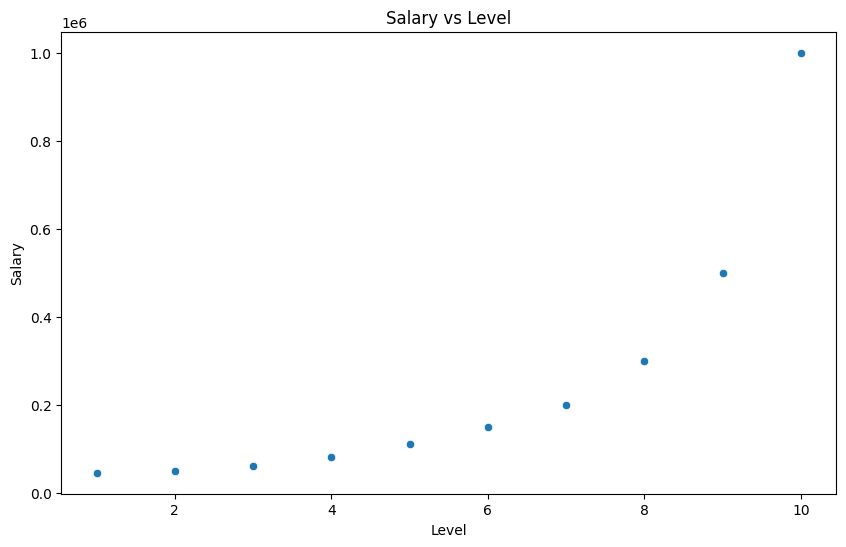

In [ ]:
data=pd.read_csv('/content/Position_Salaries.csv')
data.head(10)
display(data.describe())
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Level', y='Salary', data=data)
plt.title('Salary vs Level')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

### Based on the exploratory data analysis, answer the following


* Can you use a simple linear regression model to fit this data (Yes/No)?
> * No
* If you use a simple linear model to fit this data, will it fit well (Yes/No)?
> * No
* Explain why you said yes or no to the above questions.
>*  Because the points are not linearly related.



## Polynomial Regression

**Construct a second order Model:** $$\;\;\;\;
\hat y = w_1 x_1^2 + w_2x_1 + b
$$

**Construct a Cost function:**
>$$MSE(w_1,w_2,b)= \frac{1}{n}{\Sigma_{i=1}^{n}(y_i-(w_1x_{1i}^{2}+w_2x_{1i}+b))}^2$$

Predicted Salary for level 7.5: $328672.35


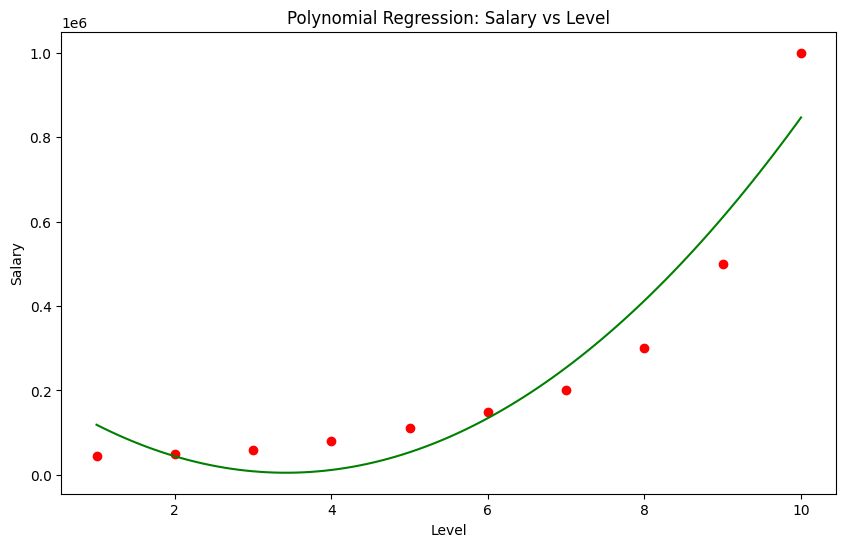

In [ ]:
X = data['Level'].values.reshape(-1, 1)
y = data['Salary'].values
X_poly = np.hstack((X, X**2))
X_poly = np.hstack((np.ones((X_poly.shape[0], 1)), X_poly))
coefficients = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)

def poly_model(x):
    return coefficients[0] + coefficients[1] * x + coefficients[2] * x**2

level_new = 7.5
predicted_salary = poly_model(level_new)
print(f"Predicted Salary for level {level_new}: ${predicted_salary:.2f}")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red')
plt.plot(np.linspace(min(X), max(X), 100), poly_model(np.linspace(min(X), max(X), 100)), color='green')
plt.title('Polynomial Regression: Salary vs Level')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

### By analysing the cost function, answer the following


* Can you use mean squared error as the cost function (Yes/No)?
> * Yes
* Explain why you said yes or no to the above questions.
> * It's a suitable cost function for polynomial regression as it measures the average squared difference between predicted and actual values.

**Derivatives of cost function:**
>* Derivative w.r.t. $w_1$
$$\frac{∂MSE}{∂w_1}= -\frac{2}{N}{\Sigma_{i=1}^{n}(y_i-(w_1x_{1i}^{2}+w_2x_{1i}+b)})x_{1i}^2$$
>* Derivative w.r.t. $w_2$
$$\frac{∂MSE}{∂w_2}= -\frac{2}{N}{\Sigma_{i=1}^{n}(y_i-(w_1x_{1i}^{2}+w_2x_{1i}+b)})x_{1i}$$
>* Derivative w.r.t. $b$
$$\frac{∂MSE}{∂b}= -\frac{2}{N}{\Sigma_{i=1}^{n}(y_i-(w_1x_{1i}^{2}+w_2x_{1i}+b)})$$

**Gradient Descent Algorithm:**
```
Repeat until converges:
```
$${\Delta w_1}= -\frac{2}{N}{\Sigma_{i=1}^{n}(y_i-(w_1x_{1i}^{2}+w_2x_{1i}+b)})x_{1i}^2$$
$${\Delta w_2}= -\frac{2}{N}{\Sigma_{i=1}^{n}(y_i-(w_1x_{1i}^{2}+w_2x_{1i}+b)})x_{1i}$$
$${\Delta b}= -\frac{2}{N}{\Sigma_{i=1}^{n}(y_i-(w_1x_{1i}^{2}+w_2x_{1i}+b)})$$


## Implementation of the model

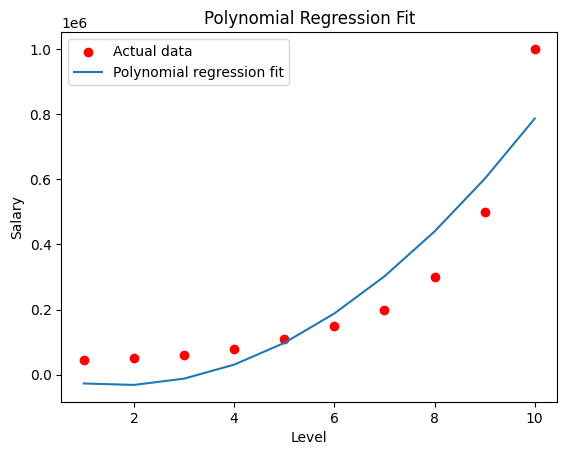

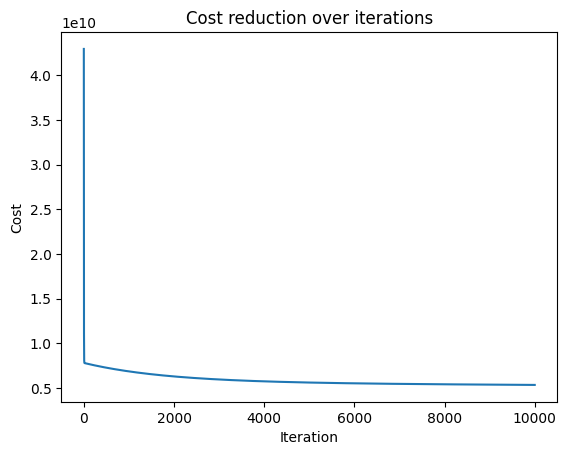

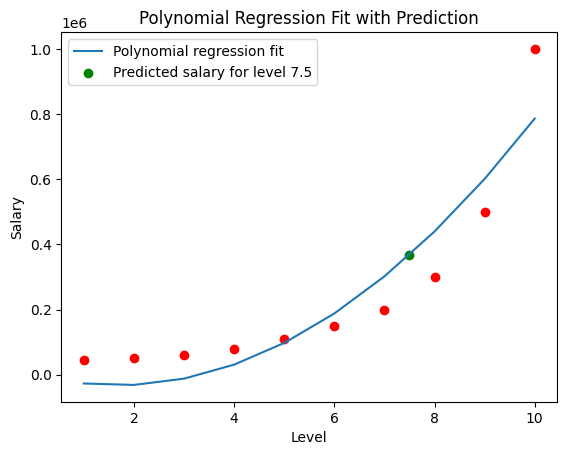

Predicted Salary for level 7.5: $367,915.23


In [8]:
# Polynomial Regression Model Function
def polynomial_regression(x, coefficients):
    """ Calculates y_pred = b + w1*x + w2*x^2 """
    y_pred = np.dot(x, coefficients)
    return y_pred

# Cost Function - Mean Squared Error
def compute_cost(X, y, coefficients):
    """ Computes the mean squared error cost """
    n = len(y)
    y_pred = polynomial_regression(X, coefficients)
    cost = (1/(2*n)) * np.sum((y_pred - y) ** 2)
    return cost

# Derivative of Cost Function
def derivatives(X, y, coefficients):
    """ Computes the derivatives of the MSE cost function """
    n = len(y)
    y_pred = polynomial_regression(X, coefficients)
    d_coefficients = (1/n) * np.dot(X.T, (y_pred - y))
    return d_coefficients

# Gradient Descent Function to Minimize the Cost Function
def gradient_descent(X, y, coefficients, learning_rate, iterations):
    """ Performs gradient descent to learn coefficients """
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        coefficients -= learning_rate * derivatives(X, y, coefficients)
        cost_history[i] = compute_cost(X, y, coefficients)
    return coefficients, cost_history

# Load the dataset
data=pd.read_csv(r"Position_Salaries.csv")
X = data['Level'].values.reshape(-1, 1)
y = data['Salary'].values

# Prepare polynomial features: x, x^2
X_poly = np.hstack((np.ones((X.shape[0], 1)), X, X**2))
# Initial coefficients (b, w1, w2)
coefficients = np.zeros(3)
learning_rate = 0.0001
iterations = 10000

# Run gradient descent
coefficients, cost_history = gradient_descent(X_poly, y, coefficients, learning_rate, iterations)

# Predicting using optimized coefficients
y_pred = polynomial_regression(X_poly, coefficients)
# Plot polynomial model
plt.scatter(X, y, color='red', label='Actual data')
plt.plot(X, y_pred, label='Polynomial regression fit')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()

# Plot iteration vs cost
plt.plot(range(iterations), cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost reduction over iterations')
plt.show()
# New level prediction
level_new = 7.5
new_X = np.array([1, level_new, level_new**2]).reshape(1, -1)
predicted_salary = polynomial_regression(new_X, coefficients)

# Plot with the new prediction
plt.scatter(X, y, color='red')
plt.plot(X, y_pred, label='Polynomial regression fit')
plt.scatter([level_new], [predicted_salary], color='green', label=f'Predicted salary for level {level_new}')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Polynomial Regression Fit with Prediction')
plt.legend()
plt.show()

print(f"Predicted Salary for level {level_new}: ${predicted_salary[0]:,.2f}")

### Answer the following

* What is learning rate?
> * The step size of the gradient descent optimization algorithm is determined by a hyperparameter known as the learning rate at each iteration.
* What will happen if the learning rate is too large?
> * If the step size is too large, it may not converge to the minimum. Instead, it could overshoot, leading to divergence or oscillations around the optimal values.
* What will happen if the learning rate is too small?
> * If the learning rate is too low, the optimization process may take a long time to converge because the updates to the model parameters are very small. This can result in a slow progress towards the optimal solution, requiring more iterations to reach the desired level of accuracy or performance. Consequently, the training process can become inefficient and time-consuming.
* If you what to change the second order (quadratic) model to third order model what all things will change in the above code?
$$ y = w_1 x^2 + w_2 x + b $$
to:
$$ y = w_3 x^3 + w_1 x^2 + w_2 x + b $$

 Gradient Calculation for w_3:Introduce a new gradient calculation for w_3:$$
 \frac{\partial MSE}{\partial w_3} = -\frac{2}{n} \sum_{i=1}^{n} \left(y_i - (w_3 x_i^3 + w_1 x_i^2 + w_2 x_i + b)\right) x_i^3 $$

 Update Rule for w_3:
Update w_3 in each iteration:
 w_3 :$$w_3= w_3 - \alpha \frac{\partial MSE}{\partial w_3} $$

 Initialization:
Start with an initial value for w_3 similar to other parameters.
